<a href="https://colab.research.google.com/github/AndrewH707/TumorClassification/blob/main/PrimaryTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
url = 'https://raw.githubusercontent.com/AndrewH707/BrainTumorDetection/main/primary-tumor.csv'
data = pd.read_csv(url)
print("The size of the data is: ", data.shape)
data.head()

The size of the data is:  (309, 18)


,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,class
0,>=60,female,NaN,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,lung
1,>=60,male,NaN,poorly,False,False,False,False,False,True,False,False,False,True,False,True,False,lung
2,30-59,female,adefalse,NaN,False,False,False,True,False,False,False,True,False,False,True,False,False,breast
3,30-59,female,adefalse,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,ovary
4,30-59,female,adefalse,NaN,False,False,False,True,True,False,False,False,False,False,False,False,False,ovary


# Balanced or Imbalanced target class


In [3]:
target = data.values[:, -1]
counter  = Counter(target)
for k, v in counter.items():
  per = v/ len(target) *100
  print('Class = %s, Count =%d, Percentage = %.3f%%' % (k, v, per)) 

Class = lung, Count =81, Percentage = 26.214%
Class = breast, Count =18, Percentage = 5.825%
Class = ovary, Count =19, Percentage = 6.149%
Class = colon, Count =14, Percentage = 4.531%
Class = prostate, Count =8, Percentage = 2.589%
Class = head and neck, Count =14, Percentage = 4.531%
Class = thyroid, Count =14, Percentage = 4.531%
Class = pancreas, Count =28, Percentage = 9.061%
Class = liver, Count =7, Percentage = 2.265%
Class = kidney, Count =23, Percentage = 7.443%
Class = salivary glands, Count =2, Percentage = 0.647%
Class = rectum, Count =6, Percentage = 1.942%
Class = gallbladder, Count =15, Percentage = 4.854%
Class = stomach, Count =38, Percentage = 12.298%
Class = esophagus, Count =9, Percentage = 2.913%
Class = corpus uteri, Count =6, Percentage = 1.942%
Class = testis, Count =1, Percentage = 0.324%
Class = cervix uteri, Count =2, Percentage = 0.647%
Class = duoden and sm.int, Count =1, Percentage = 0.324%
Class = bladder, Count =2, Percentage = 0.647%
Class = vagina, Cou

In [4]:
# we'll reduce the number of classes by removing those with counts less than 6
# we can list the above in a list, and iterate through the labels to remove all
# instances

from collections import defaultdict

#list of classes we'll remove
classes_to_remove = ['testis', 'cervix uteri', 'duoden and sm.int', 'bladder', 'vagina', 'salivary glands', 'corpus uteri', 'prostate', 'rectum', 'liver', 'esophagus']

data = data[~data['class'].isin(classes_to_remove)]

#re-do our counter
target = data.values[:, -1]
counter  = Counter(target)
for k, v in counter.items():
  per = v/ len(target) *100
  print('Class = %s, Count =%d, Percentage = %.3f%%' % (k, v, per)) 

Class = lung, Count =81, Percentage = 30.682%
Class = breast, Count =18, Percentage = 6.818%
Class = ovary, Count =19, Percentage = 7.197%
Class = colon, Count =14, Percentage = 5.303%
Class = head and neck, Count =14, Percentage = 5.303%
Class = thyroid, Count =14, Percentage = 5.303%
Class = pancreas, Count =28, Percentage = 10.606%
Class = kidney, Count =23, Percentage = 8.712%
Class = gallbladder, Count =15, Percentage = 5.682%
Class = stomach, Count =38, Percentage = 14.394%


In [5]:
# print new shape of data
print("New size of the data: ", data.shape)
data.head()

New size of the data:  (264, 18)


,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,class
0,>=60,female,NaN,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,lung
1,>=60,male,NaN,poorly,False,False,False,False,False,True,False,False,False,True,False,True,False,lung
2,30-59,female,adefalse,NaN,False,False,False,True,False,False,False,True,False,False,True,False,False,breast
3,30-59,female,adefalse,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,ovary
4,30-59,female,adefalse,NaN,False,False,False,True,True,False,False,False,False,False,False,False,False,ovary


# Missing Values

In [6]:
print("The total amount of missing values is: ", data.isnull().sum().sum())
# now we'll iterate through the columns.
names = data.columns.to_list()
target_names = data['class'].unique() #save this for later.. confusion matrix
print(names)
for name in names:
  numna = data[name].isnull().sum().sum() 
  print("Column, ", name, "has ", numna, " missing values")

The total amount of missing values is:  180
['age', 'sex', 'histologic-type', 'degree-of-diffe', 'bone', 'bone-marrow', 'lung', 'pleura', 'peritoneum', 'liver', 'brain', 'skin', 'neck', 'supraclavicular', 'axillar', 'mediastinum', 'abdominal', 'class']
Column,  age has  0  missing values
Column,  sex has  1  missing values
Column,  histologic-type has  59  missing values
Column,  degree-of-diffe has  118  missing values
Column,  bone has  0  missing values
Column,  bone-marrow has  0  missing values
Column,  lung has  0  missing values
Column,  pleura has  0  missing values
Column,  peritoneum has  0  missing values
Column,  liver has  0  missing values
Column,  brain has  0  missing values
Column,  skin has  1  missing values
Column,  neck has  0  missing values
Column,  supraclavicular has  0  missing values
Column,  axillar has  1  missing values
Column,  mediastinum has  0  missing values
Column,  abdominal has  0  missing values
Column,  class has  0  missing values


In [7]:
target = data.values[:, 3] #print a count of the number of instances of the 'degree-of-diffe' class
counter  = Counter(target)
for k, v in counter.items():
  per = v/ len(target) *100
  print('Class = %s, Count =%d, Percentage = %.3f%%' % (k, v, per)) 

Class = nan, Count =118, Percentage = 44.697%
Class = poorly, Count =89, Percentage = 33.712%
Class = well, Count =40, Percentage = 15.152%
Class = fairly, Count =17, Percentage = 6.439%


In [8]:
mode = data['degree-of-diffe'].mode() #mode is 'poorly'
print(type(mode), mode)
data['degree-of-diffe'] = data['degree-of-diffe'].fillna('poorly')
target = data.values[:, 3]
counter  = Counter(target)
for k, v in counter.items():
  per = v/ len(target) *100
  print('Class = %s, Count =%d, Percentage = %.3f%%' % (k, v, per)) 

<class 'pandas.core.series.Series'> 0    poorly
dtype: object
Class = poorly, Count =207, Percentage = 78.409%
Class = well, Count =40, Percentage = 15.152%
Class = fairly, Count =17, Percentage = 6.439%


In [9]:
data = data.dropna()
print("Current Shape of the data: ", data.shape)
target = data.values[:, -1]
counter  = Counter(target)
for k, v in counter.items():
  per = v/ len(target) *100
  print('Class = %s, Count =%d, Percentage = %.3f%%' % (k, v, per)) 

Current Shape of the data:  (203, 18)
Class = breast, Count =17, Percentage = 8.374%
Class = ovary, Count =17, Percentage = 8.374%
Class = colon, Count =13, Percentage = 6.404%
Class = lung, Count =43, Percentage = 21.182%
Class = head and neck, Count =10, Percentage = 4.926%
Class = pancreas, Count =26, Percentage = 12.808%
Class = kidney, Count =20, Percentage = 9.852%
Class = gallbladder, Count =14, Percentage = 6.897%
Class = stomach, Count =33, Percentage = 16.256%
Class = thyroid, Count =10, Percentage = 4.926%


In [10]:
X, y = data.drop('class', axis = 1), data['class']
print(X.shape, y.shape) #shapes of our inputs and outputs]
X.head()

(203, 17) (203,)


,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
2,30-59,female,adefalse,poorly,False,False,False,True,False,False,False,True,False,False,True,False,False
3,30-59,female,adefalse,poorly,False,False,False,False,True,False,False,False,False,False,False,False,False
4,30-59,female,adefalse,poorly,False,False,False,True,True,False,False,False,False,False,False,False,False
5,30-59,male,adefalse,poorly,False,False,False,False,False,True,False,False,False,False,False,False,False
7,30-59,female,adefalse,poorly,True,False,False,False,False,False,True,False,False,False,False,True,False


In [11]:
# find indicies of True/False Values we want to transform
bools = X.select_dtypes(include = ['bool', 'object']).columns
bools = bools.delete((0, 1, 2, 3)) #delete indicies of columns that aren't in True/False Format
print(bools)

for i in bools:
  temp = X[i].astype(int)
  X[i] = temp

print(X)

Index(['bone', 'bone-marrow', 'lung', 'pleura', 'peritoneum', 'liver', 'brain',
       'skin', 'neck', 'supraclavicular', 'axillar', 'mediastinum',
       'abdominal'],
      dtype='object')
       age     sex histologic-type  ... axillar  mediastinum  abdominal
2    30-59  female        adefalse  ...       1            0          0
3    30-59  female        adefalse  ...       0            0          0
4    30-59  female        adefalse  ...       0            0          0
5    30-59    male        adefalse  ...       0            0          0
7    30-59  female        adefalse  ...       0            1          0
..     ...     ...             ...  ...     ...          ...        ...
298   >=60  female        adefalse  ...       0            0          1
302  30-59    male        adefalse  ...       0            1          0
306  30-59    male      epidermoid  ...       1            0          0
307  30-59  female        adefalse  ...       0            0          0
308  30-59  femal

In [12]:
# ordinal encoding for age, meaning we care about the ordering of the labels
columns = X.columns.to_list()
X = X.to_numpy()
j = 0 #iterate through first column
for i in range(0, X.shape[0], 1):
  if X[i, j] == '<30':
    X[i, j] = 0
  elif X[i, j] == '30-59':
    X[i, j] = 1
  elif X[i, j] == '>=60':
    X[i, j] = 2
  else:
    print('error', i, X[i, j]) #for debugging...
print(X[0:5, :])

[[1 'female' 'adefalse' 'poorly' 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [1 'female' 'adefalse' 'poorly' 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 'female' 'adefalse' 'poorly' 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 'male' 'adefalse' 'poorly' 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 'female' 'adefalse' 'poorly' 1 0 0 0 0 0 1 0 0 0 0 1 0]]


In [13]:
# we'll do a simple 1/0 encoding for male, female, while checking capitalization
j = 1
for i in range(0, X.shape[0], 1):
  if X[i, j].lower() == 'female':
    X[i, j] = 0
  elif X[i, j].lower() == 'male':
    X[i, j] = 1
  else:
    print('error', i, X[i, j])
X = pd.DataFrame(X, columns = columns)
X

,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,0,adefalse,poorly,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1,0,adefalse,poorly,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,adefalse,poorly,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1,1,adefalse,poorly,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,adefalse,poorly,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2,0,adefalse,poorly,0,0,0,0,0,1,0,0,0,0,0,0,1
199,1,1,adefalse,poorly,1,0,0,0,0,0,0,0,0,0,0,1,0
200,1,1,epidermoid,poorly,1,0,0,0,0,0,0,1,0,0,1,0,0
201,1,0,adefalse,well,0,0,0,1,1,0,0,0,0,0,0,0,0


In [14]:
#import our transformsers 
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

t = [('one_hot', OneHotEncoder(), [2, 3])]
col_transformer = ColumnTransformer(transformers=t, remainder = 'passthrough')
X = col_transformer.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 1]], dtype=object)

In [15]:
# transform our outputs 
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
y

array([0, 6, 6, 1, 5, 6, 3, 7, 5, 3, 5, 5, 6, 4, 5, 0, 7, 5, 7, 2, 0, 0,
       2, 8, 8, 5, 9, 7, 7, 7, 7, 6, 8, 2, 9, 0, 8, 0, 8, 5, 9, 0, 7, 4,
       4, 7, 5, 6, 5, 5, 3, 5, 9, 3, 6, 5, 5, 8, 5, 4, 8, 4, 2, 8, 8, 0,
       9, 5, 8, 3, 6, 5, 8, 8, 0, 8, 3, 7, 5, 6, 8, 0, 6, 8, 0, 4, 0, 8,
       8, 0, 5, 5, 5, 4, 5, 2, 8, 7, 2, 7, 1, 9, 5, 7, 7, 0, 1, 7, 4, 8,
       5, 8, 2, 1, 0, 5, 1, 7, 7, 4, 1, 5, 6, 5, 4, 8, 7, 4, 5, 2, 4, 1,
       1, 8, 4, 7, 5, 5, 5, 4, 6, 8, 8, 8, 9, 0, 9, 2, 2, 7, 3, 1, 7, 8,
       8, 7, 7, 5, 7, 8, 5, 2, 1, 8, 7, 3, 8, 1, 5, 4, 5, 6, 0, 4, 5, 4,
       4, 5, 5, 9, 6, 8, 5, 5, 6, 6, 9, 3, 1, 5, 3, 4, 5, 2, 7, 8, 1, 8,
       2, 4, 5, 6, 2])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import random

r = random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# define the cross valdiator that will be used uniformly across all classifiers
# for each trial
cv = RepeatedKFold(n_splits = 3, n_repeats = 3)

# **Logistic Regression**

In [17]:
# Import library for our grid search
from sklearn.model_selection import GridSearchCV
#Import library for evalating the model 
from sklearn import metrics

In [18]:
from sklearn.linear_model import LogisticRegression

#define model
model = LogisticRegression()
#define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2']
space['C'] = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#define search
search = GridSearchCV(model, space, scoring = 'accuracy', n_jobs = -1, cv= cv)
# execute search
result = search.fit(X_train, y_train)
results = search.return_train_score
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.4213071895424837
Best Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [19]:
# train on all of taining data and use best hyperparameters to evaluate accuracy 
# on test set
optimalmodel = result.best_estimator_
optimalmodel.fit(X_train, y_train)
y_predict = optimalmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print('accuracy on test set: %s' % accuracy)


accuracy on test set: 0.45098039215686275


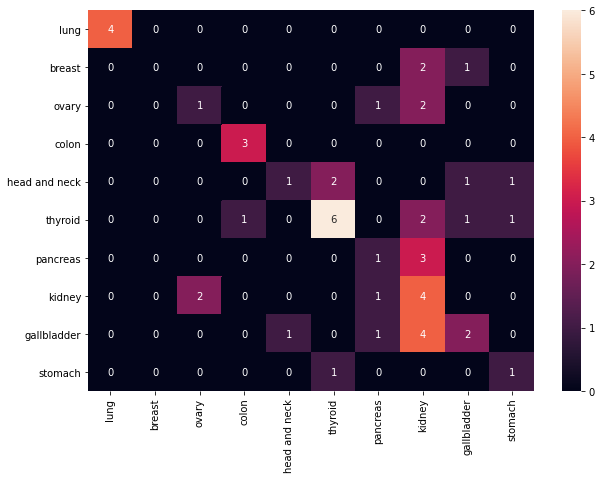

In [20]:
#confusion matrix for Log. Regression
conf_mx = confusion_matrix(y_test, y_predict)
df = pd.DataFrame(conf_mx, index = [i for i in target_names], columns = [i for i in target_names])
plt.figure(figsize = (10, 7))
sn.heatmap(df, annot = True)

#**k-Nearest Neighbors**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
#the paper uses 26 values of K ranging from l = 1 to |trainset|

#define model 
model = KNeighborsClassifier()
# define search space
k_range = list(range(1, 27))
space = dict()
space['weights'] = ['uniform', 'distance']
space['n_neighbors'] = k_range
#define search 
search = GridSearchCV(model, space, scoring = 'accuracy', n_jobs = -1, cv = cv)
#execute search 
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.35089324618736384
Best Hyperparameters: {'n_neighbors': 4, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [22]:
# train on all of taining data and use best hyperparameters to evaluate accuracy 
# on test set
optimalmodel = result.best_estimator_
optimalmodel.fit(X_train, y_train)
y_predict = optimalmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print('accuracy on test set: %s' % accuracy)

accuracy on test set: 0.37254901960784315


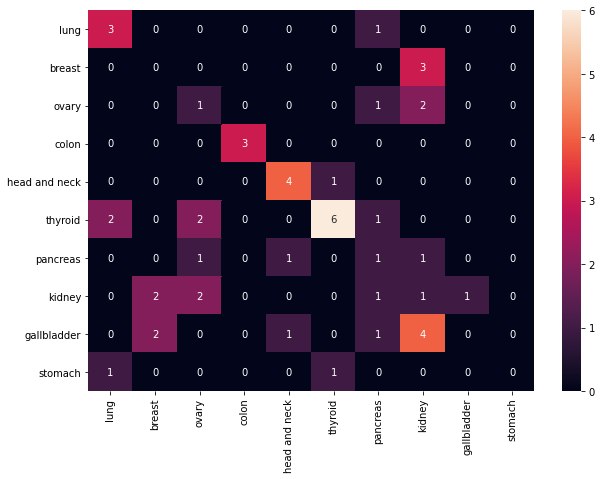

In [23]:
#confusion matrix for K-NN
conf_mx = confusion_matrix(y_test, y_predict)
df = pd.DataFrame(conf_mx, index = [i for i in target_names], columns = [i for i in target_names])
plt.figure(figsize = (10, 7))
sn.heatmap(df, annot = True)

# **Random Forest**:

In [24]:
from sklearn.ensemble import RandomForestClassifier
# the paper uses 1024 trees, & the size of the feature set considered for each 
# split is 1,2,4,5,8,12,16, & 20. 

#define model 
model = RandomForestClassifier()
#define search space
max_features = [1, 2, 4, 5, 8, 12, 16, 20]
space = dict()
space['n_estimators'] = [1024]
space['criterion'] = ['gini']
space['max_features'] = max_features
#define search:
search = GridSearchCV(model, space, scoring = 'accuracy', n_jobs = -1, cv = cv)
#execute search
result = search.fit(X_train, y_train)
#summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.37533769063180833
Best Hyperparameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 1024}
Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1024,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


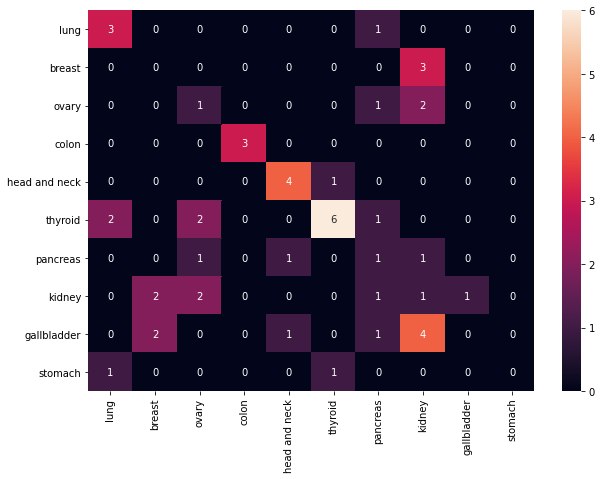

In [25]:
#confusion matrix for RF
conf_mx = confusion_matrix(y_test, y_predict)
df = pd.DataFrame(conf_mx, index = [i for i in target_names], columns = [i for i in target_names])
plt.figure(figsize = (10, 7))
sn.heatmap(df, annot = True)

In [26]:
optimalmodel = result.best_estimator_
optimalmodel.fit(X_train, y_train)
y_predict = optimalmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print('accuracy on test set: %s' % accuracy)

accuracy on test set: 0.43137254901960786


# Support Vector Machine 

In [27]:
from sklearn import model_selection
from sklearn import svm

# define search space
model = svm.SVC()
# define search space
space = dict()
space['C'] = [0.001, 0.01, 0.1, 1, 10, 100]
space['gamma'] = [0.0001, 0.001, 0.01, 0.1]
space['kernel'] = ['rbf', 'linear']
#define search:
search = GridSearchCV(model, space, scoring = 'accuracy', n_jobs = -1, cv = cv)
#execute search
result = search.fit(X_train, y_train)
#summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.4057516339869281
Best Hyperparameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Best Estimator: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [28]:
optimalmodel = result.best_estimator_
optimalmodel.fit(X_train, y_train)
y_predict = optimalmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print('accuracy on test set: %s' % accuracy)

accuracy on test set: 0.37254901960784315


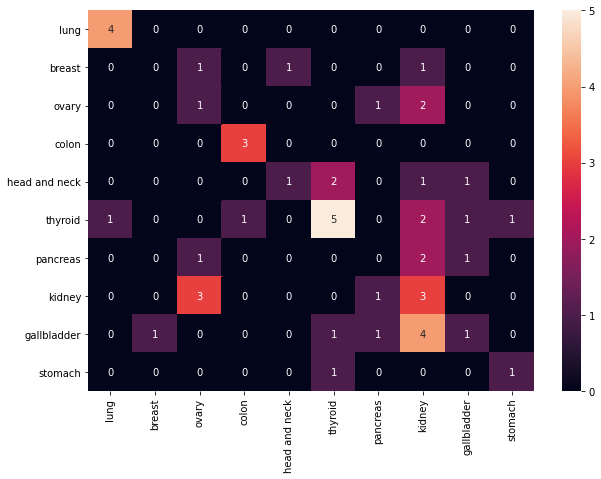

In [29]:
#confusion matrix for RF
conf_mx = confusion_matrix(y_test, y_predict)
df = pd.DataFrame(conf_mx, index = [i for i in target_names], columns = [i for i in target_names])
plt.figure(figsize = (10, 7))
sn.heatmap(df, annot = True)